<a href="https://colab.research.google.com/github/camila-marquess/analise-dataset-diabetes/blob/master/Dataset_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O dataset a ser analisado será o "Pima Indians Diabetes Database". O objetivo desta análise é classificar uma pessoa como diabética ou não a partir de algumas variáveis. Primeiramente, foi feita uma análise exploratória dos dados. Depois, foi feito o tratamento dos dados nulos e inserção de novas variáveis. Após isso, foi feito o modelo de árvore de decisão.**

# Importação das bibliotecas necessárias para a análise:

In [0]:
import pandas as pd 

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import numpy as np

from scipy.stats import entropy

# Leitura do dataset:

In [0]:
df = pd.read_csv('/content/diabetes.csv')

# Explicação das variáveis:

* Pregnancies: número de gestações.
* Glucose: Concentração de glicose no plasma duas horas em um teste oral de tolerância à glicose.
* Blood Pressure: Pressão Arterial.
* Skin Thickness: Espessura da pele.
* Insulin: Insulina.
* BMI: Índice de Massa Corporal.
* Diabetes Pedigree Function: Trata-se de uma função que pontua a probabilidade de diabetes com base no histórico familiar.
* Age: Idade.
* Outcome: Resultado, que está divido entre 0 - não tem diabetes e 1 - tem diabetes.

# **Análise Exploratória dos Dados**

# Verificando as 10 primeiras linhas do dataset:

In [0]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Verificando o tamanho do dataset:

In [0]:
df.shape

(768, 9)

O dataset possui 768 linhas e 9 colunas.

# Verificando se o dataset possui valores nulos: 

In [0]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pode-se perceber que não há valores nulos no dataset.

# Verificando algumas informações do datatset:

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Os dados estão todos no formato certo, não havendo necessidade de transformá-los.

# Verificando algumas estatísticas descritivas do dataset:

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Dentre as pessoas da base, o máximo de gestações são 17 no dataset, e a idade máxima é de 81 anos.

Porém, é possível perceber que há alguns dados que o valor mínimo é zero, mas que não há como esses valores serem zero. Por exemplo, de acordo com um site, os níveis de glicose são:

*    Normal: inferior a 99 mg/dL;
*   Pré-diabetes: entre 100 e 125 mg/dL;
*   Diabetes: superior a 126 mg/dL em dois dias diferentes.

Portanto, decidiu-se por considerar esses valores como valores nulos.
  
Fonte: https://www.tuasaude.com/exame-da-glicose/

In [0]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Verificando novamente os valores nulos no dataset: 

In [0]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Agora o dataset tem 5 valores nulos em Glicose, 35 em Blood Pressure, 227 em Skin Thickness, 374 em Insulin e 11 em BMI. 

# Tratamento dos valores nulos:

121.6867627785059
117.0
0.5309885349396285


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  4.,  19.,  87., 149., 161., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <a list of 10 Patch objects>)

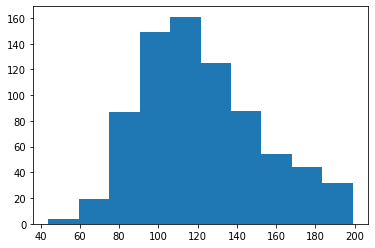

In [0]:
# Verificando a média, a mediana e a distribuição dos dados da variável Glucose:

print(df.Glucose.mean())
print(df.Glucose.median())
print(df.Glucose.skew())

plt.figure()
plt.hist(df.Glucose)

Na Glucose, será imputado a média nos valores nulos.

72.40518417462484
72.0
0.13415273171959252


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  3.,   2.,  35., 118., 226., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <a list of 10 Patch objects>)

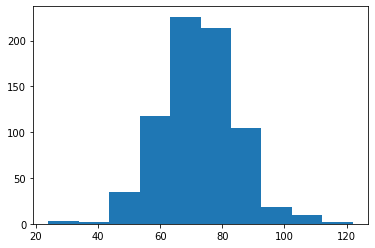

In [0]:
# Verificando a média, a mediana e a distribuição dos dados da variável Blood Pressure:

print(df.BloodPressure.mean())
print(df.BloodPressure.median())
print(df.BloodPressure.skew())

plt.figure()
plt.hist(df.BloodPressure)

Na variável Blood Pressure será imputadoa média nos valores nulos.

29.153419593345657
29.0
0.690619013984192


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 59., 141., 181., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <a list of 10 Patch objects>)

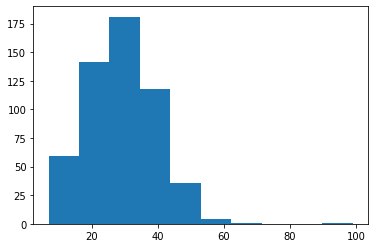

In [0]:
# Verificando a média, a mediana e a distribuição da variável Skin Thickness:

print(df.SkinThickness.mean())
print(df.SkinThickness.median())
print(df.SkinThickness.skew())

plt.figure()
plt.hist(df.SkinThickness)

Na variável SkinThickness será imputado a mediana, pois a distribuição dos dados está à direita.

155.5482233502538
125.0
2.166463843812443


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([142., 143.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <a list of 10 Patch objects>)

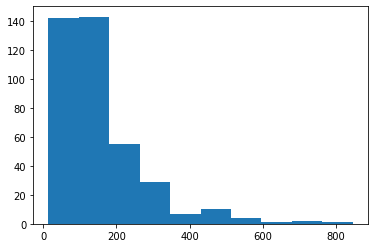

In [0]:
# Verificando a média, a mediana e a distribuição da variável Insulin: 

print(df.Insulin.mean())
print(df.Insulin.median())
print(df.Insulin.skew())

plt.figure()
plt.hist(df.Insulin)

Na variável Insulin será imputado a mediana, pois os dados estão distribuidos à direita.

32.45746367239099
32.3
0.5939697505712673


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 52., 161., 196., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <a list of 10 Patch objects>)

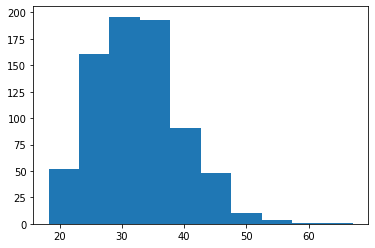

In [0]:
# Verificando a média, a mediana e a distribuição da variável BMI:

print(df.BMI.mean())
print(df.BMI.median())
print(df.BMI.skew())

plt.figure()
plt.hist(df.BMI)

Na variável BMI será imputado a mediana nos valores nulos.

# Imputação de valores nos valores nulos:

In [0]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)

df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)

df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)

df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

df['BMI'].fillna(df['BMI'].median(), inplace = True)

Verificando se ainda há valores nulos no dataset:

In [0]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Histograma da quantidade de mulheres que têm diabtes e mulheres que não têm: 

In [0]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

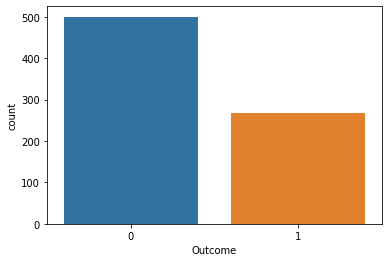

In [0]:
sns.countplot(x = 'Outcome', data = df)
plt.show()

NO dataset, 500 mulheres não têm diabetes e 268 têm. Por meio do histograma também é possível perceber que há mais mulheres que não têm diabetes do que mulheres que têm a doença.

# Mulheres que tiveram mais gestações, são as que mais têm diabetes? 

In [0]:
(
    df[(df['Outcome'] == 1) & (df['Pregnancies'] > 0)]
    .groupby('Pregnancies').Outcome.count().reset_index()
    .rename(columns={'Outcome':'Quantidade de Mulheres','Pregnancies':'Quantidade de Gestações'})

)

,Quantidade de Gestações,Quantidade de Mulheres
0,1,29
1,2,19
2,3,27
3,4,23
4,5,21
5,6,16
6,7,25
7,8,22
8,9,18
9,10,10


De acordo com os dados do dataset, 230 mulheres que tiveram gestações apresentaram diabetes.

# Verificando o número de mulheres que tiveram gestações e não apresentaram diabetes:

In [0]:
(
    df[(df['Outcome'] == 0) & (df['Pregnancies'] > 0)]
    .groupby('Pregnancies').Outcome.count().reset_index()
    .rename(columns={'Pregnancies':'Quantidade de Gestações','Outcome':'Quantidade de Mulheres'})
)

,Quantidade de Gestações,Quantidade de Mulheres
0,1,106
1,2,84
2,3,48
3,4,45
4,5,36
5,6,34
6,7,20
7,8,16
8,9,10
9,10,14


O número de mulheres que tiveram gestações e não apresentaram diabetes é maior (427) que o número de mulheres que tiveram gestações e apresentaram diabetes.

# Verificando a quantidade de mulheres que não tiveram gestações e apresentaram diabetes:

In [0]:
(
    df[(df.Pregnancies == 0) & (df.Outcome == 1)]
    .groupby('Pregnancies').Outcome.count().reset_index()
    .rename(columns={'Pregnancies':'Quantidade de Gestações','Outcome':'Quantidade de Mulheres'})
)

,Quantidade de Gestações,Quantidade de Mulheres
0,0,38


Somente 38 mulheres que não tiveram gestações também não tiveram diabetes.

# Verificando a quantidade de mulheres que não tiveram gestações e não apresentaram diabetes:

In [0]:
(
    df[(df.Pregnancies == 0) & (df.Outcome == 0)]
    .groupby('Pregnancies').Outcome.count().reset_index()
    .rename(columns={'Pregnancies':'Quantidade de Gestações','Outcome':'Quantidade de Mulheres'})
)

,Quantidade de Gestações,Quantidade de Mulheres
0,0,73


A quantidade de mulheres que não tiveram gestações e não apresentaram diabetes é maior, são 73 mulheres.

# Será que as mulheres que tiveram gestações e têm mais de 30 anos são as que mais têm diabetes?

In [0]:
(
    df[(df['Pregnancies'] > 0 ) & (df['Age'] > 30)]
    .groupby('Outcome').Pregnancies.count()
    .reset_index()
)

,Outcome,Pregnancies
0,0,161
1,1,167


A diferença é apenas de 6 mulheres, mas o número de mulheres que tiveram gestações e têm mais de 30 anos e apresentou diabetes foi maior. 

# Verificando a pressão arterial quando a pessoa tem diabetes e quando ela não tem diabetes: 

In [0]:
(
    df[df.Outcome == 1]
    .groupby('Outcome').BloodPressure.agg('mean')
)

Outcome
1    75.147324
Name: BloodPressure, dtype: float64

In [0]:
(
    df[df.Outcome == 0]
    .groupby('Outcome').BloodPressure.agg('mean')
)

Outcome
0    70.935397
Name: BloodPressure, dtype: float64

Pode-se perceber que, em média, a pressão arterial de mulheres que têm diabetes é maior que as mulheres que não têm.

# Verificando o BMI de mulheres que têm diabetes e de mulheres que não têm:

In [0]:
(
    df[df.Outcome == 1]
    .groupby('Outcome').BMI.agg('mean')
)

Outcome
1    35.383582
Name: BMI, dtype: float64

In [0]:
(
    df[df.Outcome == 0]
    .groupby('Outcome').BMI.agg('mean')
)

Outcome
0    30.8856
Name: BMI, dtype: float64

Mulheres que têm diabetes, em média, têm o BMI mais alto.

# Verificando a correlação entre as variáveis explicativas com a variável resposta - neste caso, Outcome.

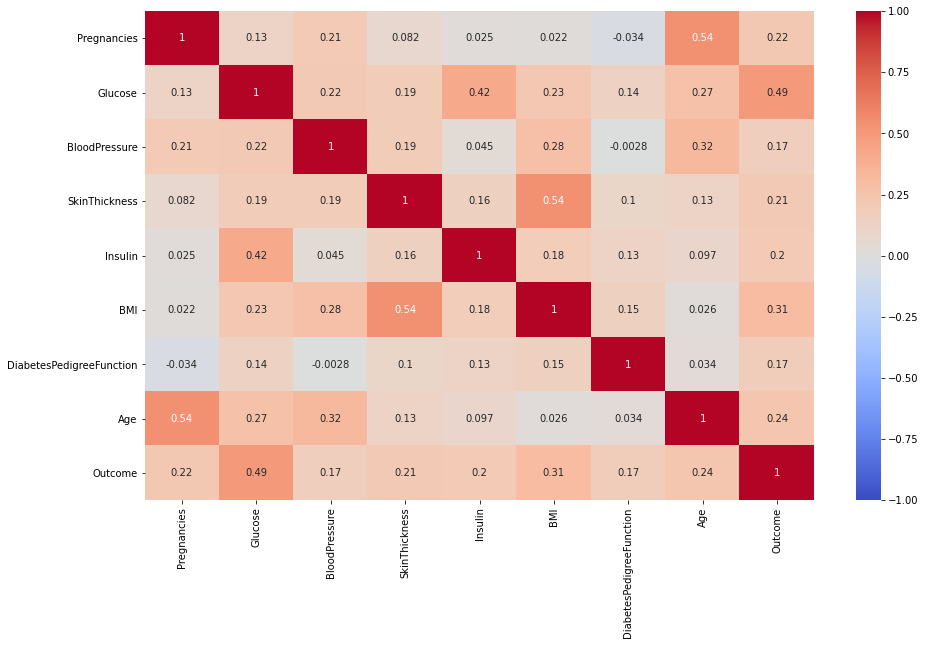

In [0]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True, vmin = - 1 , vmax = 1, cmap = 'coolwarm')
plt.show()

As variáveis: Pregnancies, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age e Pregnant têm uma correlação considerada baixa mas positiva com a variável resposta (Outcome). A variável que apresentou a correlação mais forte foi a Glucose. 

# **Aplicando o Modelo de Classificação: Decision Tree**

# Importando as bibliotecas necessárias:

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import train_test_split

# Definindo o x e o y:

In [0]:
x = df.drop(['Outcome'],axis=1)

y = df['Outcome']

# Dividindo o dataset em treino e teste:

In [0]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.25, random_state = 42)

# Verificando os shapes do dataset dividido:

In [0]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(576, 8) (576,)
(192, 8) (192,)


# Treinando o modelo de árvore de decisão: 

In [0]:
dt = DecisionTreeClassifier (criterion = 'entropy')

dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Verificando as classes: 

In [0]:
dt.classes_

array([0, 1])

# Árvore de decisão: 

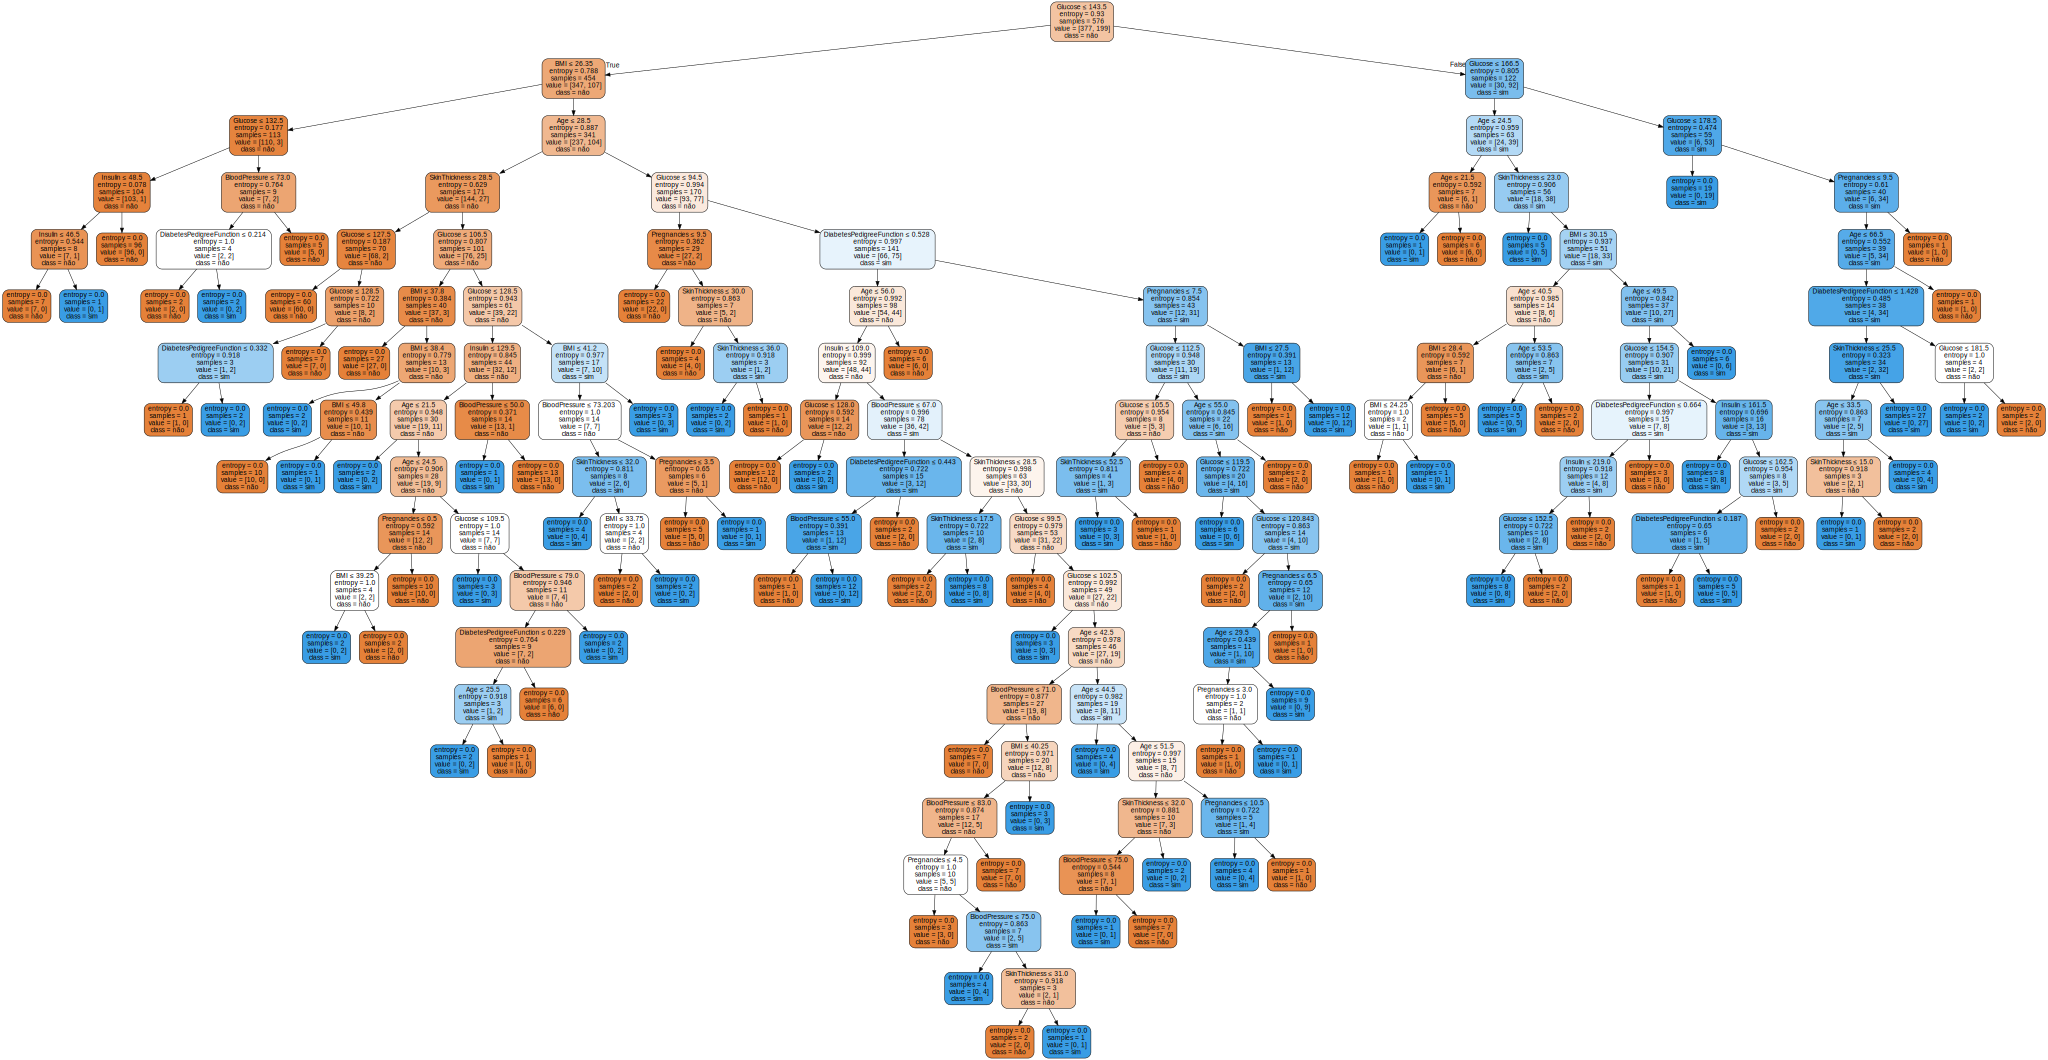

In [0]:
from sklearn import tree

import graphviz

dot = tree.export_graphviz(dt, out_file=None, 
                           feature_names = x.columns.values,  
                           class_names=["não", "sim"],  
                           filled=True, rounded=True,  
                           special_characters=True) 

graph = graphviz.Source(dot) 
graph

# Transformando a árvore de decisão em PDF:

In [0]:
from graphviz import render

graph.render('diabetes_decision_tree.gv', view=True)  
'diabetes_decision_tree.gv.pdf'

'diabetes_decision_tree.gv.pdf'

# Verificando as importâncias das features: 

In [0]:
print(dt.feature_importances_)
print(x.columns)

[0.06235585 0.34113702 0.07718405 0.10376129 0.05388275 0.13878104
 0.06854331 0.15435468]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


# Matriz de Confusão do modelo:

In [0]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, classification_report

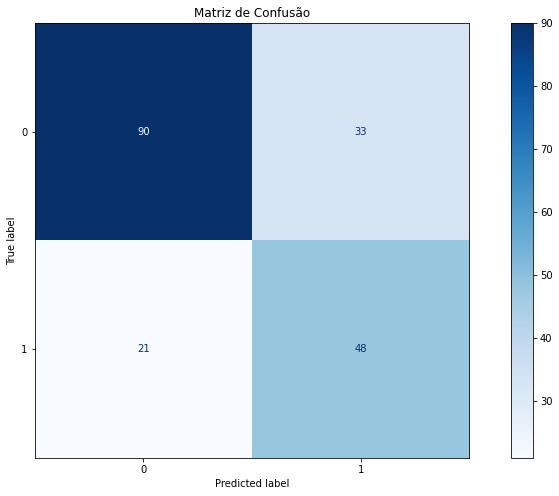

In [0]:
f, ax = plt.subplots (1,1,figsize = (15,8))

plot_confusion_matrix (dt, x_test,y_test, ax = ax,cmap = plt.cm.Blues,values_format='.4g')

ax.set_title ('Matriz de Confusão')

plt.show()

Por meio da matriz de confusão é possível perceber que: 

* O modelo predisse corretamente que 90 mulheres têm diabetes, mas errou ao predizer que 33 tinham diabtes, sendo que elas não tinham. 

* O modelo predisse corretamente que 48 mulheres tinham diabetes, mas errou ao predizer que 21 não tinham diabetes, sendo que elas tinham. 

# Como verificar quanto meu modelo acertou no total? 

* A métrica que diz quanto que o modelo acertou no total é a acurácia, para calculá-la é necessário somar os acertos do modelo e dividir pelo tamanho do dataset de teste (192, neste caso):

In [0]:
# Acurácia: 

(90 + 48) / (90 + 48 + 33 + 21)

0.71875

A acurácia do modelo foi de, aproximadamente, 72%.

# Como verificar a precisão do modelo? 

Outra métrica interessante é a precisão do modelo:

* Acerto de mulheres que não têm diabetes: 81%

In [0]:
90 / (90 + 21)

0.8108108108108109

* Acerto de mulheres que têm diabetes: 59%

In [0]:
48 / (48 + 33)

0.5925925925925926

# Verificando o modelo versus realidade, também conhecido como recall ou sesibilidade do modelo: 

* De todas as mulheres que não têm diabetes, quantas eu previ corretamente? 73%

In [0]:
90 / (90 + 33)

0.7317073170731707

* De todas as mulheres que têm diabetes, quantas eu previ corretamente? 69% 

In [0]:
48 / (48 + 21)

0.6956521739130435

# Por meio do report do modelo, é possível verificar estas métricas também: 

In [0]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       123
           1       0.59      0.70      0.64        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.72       192



# Tendo em vista que a acurácia do modelo foi de 72%, decidiu-se por testar o dataset no Random Forest, que também é um modelo de classificação.

# **Aplicação do Modelo Random Forest:**

Importando a biblioteca necessária:

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Dividindo o x e o y:

In [0]:
xrf = df.drop(['Outcome'],axis=1)

yrf = df['Outcome']

# Dividindo o dataset em treino e teste:

In [0]:
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split (xrf, yrf, test_size = 0.25, random_state = 42)

# Treinando o modelo na Random Forest: 

In [0]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(xrf_train, yrf_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# Verificando a Matriz de Confusão com a Random Forest: 

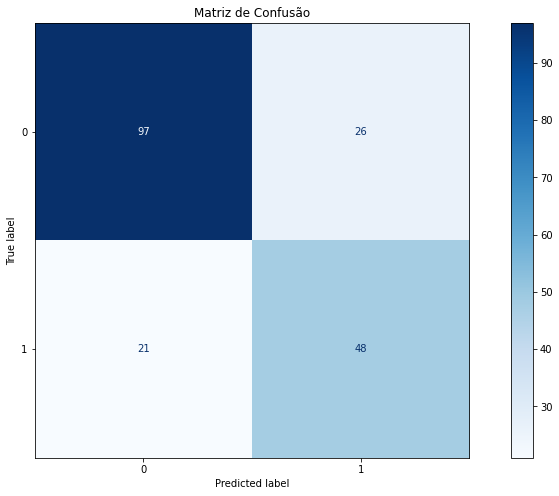

In [0]:
f, ax = plt.subplots (1,1,figsize = (15,8))

plot_confusion_matrix (rf, xrf_test,yrf_test, ax = ax,cmap = plt.cm.Blues,values_format='.4g')

ax.set_title ('Matriz de Confusão')

plt.show()

Por meio da matriz de confusão é possível perceber que:

* O modelo predisse corretamente que 97 mulheres têm diabetes, mas errou ao predizer que 26 tinham diabtes, sendo que elas não tinham.

* O modelo predisse corretamente que 48 mulheres tinham diabetes, mas errou ao predizer que 21 não tinham diabetes, sendo que elas tinham.



# Verificando os resultados do report do modelo:

In [0]:
print(classification_report(yrf_test, rf.predict(xrf_test)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.65      0.70      0.67        69

    accuracy                           0.76       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



# Verificando o report:

# Quanto que o modelo acertou no total? 

* A métrica que diz quanto que o modelo acertou no total é a acurácia, pelo report a acurácia do modelo foi de 76%.

# Como verificar a precisão do modelo?

* Outra métrica interessante é a precisão do modelo:

    * Acerto de mulheres que não têm diabetes: 82%
    * Acerto de mulheres que têm diabetes: 65%
  
    * Pode-se perceber que a precisão de mulheres que têm diabetes foi maior no modelo de Random Forest que no modelo de Decision Tree.

# Verificando o modelo versus realidade, também conhecido como recall ou sesibilidade do modelo:

* De todas as mulheres que não têm diabetes, quantas eu previ corretamente? 79%
* De todas as mulheres que têm diabetes, quantas eu previ corretamente? 70%

# Verificando o F1-Score:

* Trata-se da média entre precisão e sensibilidade, quanto mais perto de 1, melhor o resultado:

    * F1-Score de mulheres que não têm diabetes: 80%
    * F1-Score de mulheres que têm diabetes: 67%


# **Conclusões:**

* O dataset está dividido entre 500 mulheres que têm diabetes e 268 que não têm.
* Ao verificar se mulheres que tiveram mais gestações são as que mais tiveram diabetes, percebeu-se que apenas 230 mulheres que tiveram gestações apresentaram diabetes.
* Ao verificar o número de mulheres que tiveram gestações e não apresentam diabetes, obteve-se o número de 427. 
* Dentre as mulheres que não estiveram gestantes e apresentaram diabetes, tem-se 38.
* Verificando a quantidade de mulheres que não estiveram gestantes e não apresentaram diabetes, obteve-se a quantidade de 73 mulheres.
* Ao supor que mulheres que estiveram gestantes e têm mais de 30 anos, obteve-se apenas o número de 167 mulheres, enquanto o número de mulheres que estiveram gestantes e também têm 30 anos mas não apresentam diabetes é de 161.
* Ao verificar a pressão arterial de mulheres que têm diabetes e de mulheres que não a têm, pôde-se perceber que, em média, mulheres que têm diabetes tendem a ter a pressão arterial mais alta do que mulheres que não a têm. 
* Verificando o índice de massa corporal de mulheres que têm diabetes e de mulheres que não a têm, percebeu-se que mulheres que têm a doença têm, em média, um índice de massa corporal maior que as mulheres que não têm diabetes.
* Verificando a correlação entre percebeu-se que: Pregnancies, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age e Pregnant têm uma correlação considerada baixa mas positiva com a variável resposta (Outcome) e a variável que apresentou a correlação mais forte foi a Glucose.
* Tendo em vista toda essa exploração dos dados, decidiu-se por modelar o dataset com a Decision Tree, que é um modelo de classificado, pois, vale mencionar, o objetivo desta análise é classificar uma pessoa em: 0 – não apresenta diabetes, 1 – apresenta diabetes. 
* Ao rodar o modelo, ele apresentou uma acurácia de 72%;
	*  Uma precisão de 81% em mulheres que não têm diabetes e de 59% em mulheres que têm diabetes. 
	*  Um recall de 73% nas mulheres que não têm diabetes e de 70% nas mulheres que têm.
* Tendo em vista que a acurácia da Decision Tree foi de 72%, decidiu-se por aplicar o modelo de Random Forest para verificar se obteria métricas melhores.
* Ao rodar o modelo de Random Forest, a acurácia obtida foi maior, de 76%, além disso as outras métricas também tiveram resultados superiores. 
